## Text Classification
### A Getting Started Tutorial for Self Learners

In [1]:
import spacy

from sklearn.datasets import fetch_20newsgroups  # import packages which help us download dataset and load intp python
from sklearn.pipeline import Pipeline

import numpy as np  # numpy package is for fast numerical computation in Python

In [2]:
# Load the filenames and data from the 20 newsgroups dataset
# This will download the datasets if you don't have them already
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, download_if_missing=True)  
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, download_if_missing=True)

In [3]:
# What is this dataset about? 
print(twenty_train.description)

the 20 newsgroups by date dataset


In [4]:
twenty_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

Let's look at what are all the classes:

In [5]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Why do we need to convert text to numbers?

In [4]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(f'Shape of Term Frequency Matrix: {X_train_counts.shape}')

Shape of Term Frequency Matrix: (11314, 130107)


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(f'Shape of TFIDF Matrix: {X_train_tfidf.shape}') 

Shape of TFIDF Matrix: (11314, 130107)


In [8]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [9]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
text_nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_nb_clf = text_nb_clf.fit(twenty_train.data, twenty_train.target)

In [10]:
predicted = text_nb_clf.predict(twenty_test.data)
naivebayes_clf_accuracy = np.mean(predicted == twenty_test.target) * 100.

In [11]:
print(f'Test Accuracy is {naivebayes_clf_accuracy} %')

Test Accuracy is 77.38980350504514 %


In [12]:
from sklearn.linear_model import LogisticRegression as LR

In [13]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

Wall time: 9.78 s


In [14]:
lr_predicted = text_lr_clf.predict(twenty_test.data)
lr_clf_accuracy = np.mean(lr_predicted == twenty_test.target) * 100.
print(f'Test Accuracy is {lr_clf_accuracy}')

Test Accuracy is 82.79341476367499


In [15]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true=twenty_test.target, y_pred=lr_predicted)

In [16]:
import json
print(json.dumps(cf.tolist(), indent=2))

[
  [
    236,
    2,
    0,
    0,
    1,
    1,
    3,
    0,
    3,
    3,
    1,
    1,
    2,
    9,
    2,
    35,
    3,
    4,
    1,
    12
  ],
  [
    2,
    304,
    13,
    8,
    8,
    19,
    7,
    1,
    0,
    1,
    0,
    4,
    10,
    1,
    5,
    2,
    1,
    1,
    1,
    1
  ],
  [
    1,
    21,
    294,
    31,
    12,
    10,
    2,
    2,
    1,
    5,
    0,
    1,
    1,
    2,
    4,
    2,
    0,
    0,
    4,
    1
  ],
  [
    0,
    12,
    24,
    283,
    22,
    2,
    13,
    3,
    1,
    1,
    1,
    1,
    24,
    0,
    4,
    0,
    0,
    0,
    0,
    1
  ],
  [
    0,
    5,
    6,
    21,
    319,
    1,
    11,
    1,
    1,
    5,
    1,
    0,
    10,
    0,
    1,
    0,
    0,
    0,
    3,
    0
  ],
  [
    0,
    41,
    38,
    5,
    4,
    292,
    3,
    0,
    1,
    1,
    0,
    1,
    3,
    2,
    4,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    3,
    2,
    12,
    7,
    0,
    351,
    3,
    2,
    1,
  

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

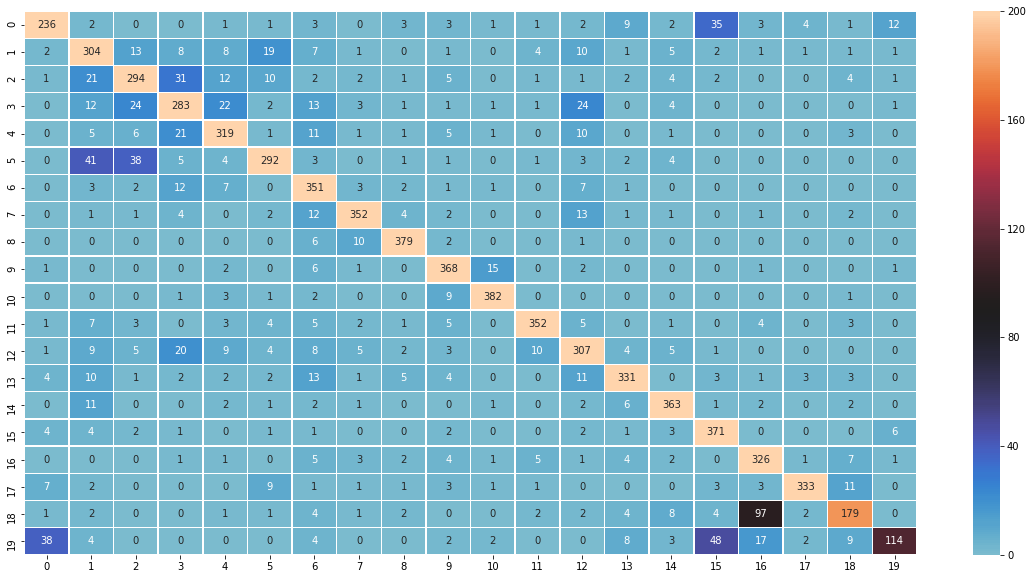

In [18]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

### Tricks of Trade
#### Removing Stop Words

In [19]:
nlp = spacy.load('en')

If there is an error above, try:
- Windows:```python -m spacy download en``` as **Administrator**
- Linux:```sudo python -m spacy download en ```

### Exploring spaCy

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'g

In [21]:
f'There are {len(STOP_WORDS)} stopwords in spaCy'

'There are 305 stopwords in spaCy'

In [22]:
# You can add your own corpora specific STOPWORDS using the .add syntax
STOP_WORDS.add("your_additional_stop_word_here")
f'After adding your own stop words, spaCy will use {len(STOP_WORDS)} stopwords'

'After adding your own stop words, spaCy will use 306 stopwords'

In [23]:
doc = nlp("I am learning the most important ideas Natural Language Processing ideas using Python")
print(doc)  # doc is a spaCy object which stores the entire document string

I am learning the most important ideas Natural Language Processing ideas using Python


**About spaCy objects**

In [24]:
for token in doc:
    print(token)

I
am
learning
the
most
important
ideas
Natural
Language
Processing
ideas
using
Python


In [25]:
simplified_doc = [token for token in doc if not token.is_punct | token.is_stop]
simplified_doc
# please note that .orth_ attribute returns the unicode string representation of the token

[I, learning, important, ideas, Natural, Language, Processing, ideas, Python]

We can also check what other things we know about these tags in the simplified_doc:

In [26]:
for token in simplified_doc:
    print(f'Token:{token.orth_}\tLemmatized:{token.lemma_}\tPart-of-Speech-Tag:{token.pos_}')

Token:I	Lemmatized:-PRON-	Part-of-Speech-Tag:PRON
Token:learning	Lemmatized:learn	Part-of-Speech-Tag:VERB
Token:important	Lemmatized:important	Part-of-Speech-Tag:ADJ
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Natural	Lemmatized:natural	Part-of-Speech-Tag:PROPN
Token:Language	Lemmatized:language	Part-of-Speech-Tag:PROPN
Token:Processing	Lemmatized:processing	Part-of-Speech-Tag:PROPN
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Python	Lemmatized:python	Part-of-Speech-Tag:NOUN


### Integrating back with our classifier pipeline

In [27]:
??CountVectorizer

In [28]:
from spacy.lang.en import English
tokenizer = English().Defaults.create_tokenizer(nlp)
def spacy_tokenizer(document):
    return [token.orth_ for token in tokenizer(document)]

In [29]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

Wall time: 9.74 s


In [30]:
def calc_print_accuracy(text_clf, test):
    predictions = text_clf.predict(test.data)
    clf_accuracy = np.mean(predictions == test.target) * 100.
    print(f'Test Accuracy is {clf_accuracy}')
    return clf_accuracy

calc_print_accuracy(text_lr_clf, twenty_test)

Test Accuracy is 82.79341476367499


82.79341476367499

In [31]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer(tokenizer=spacy_tokenizer, stop_words=list(STOP_WORDS))), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)
calc_print_accuracy(text_lr_clf, twenty_test)

Test Accuracy is 78.18640467339351
Wall time: 3min 16s
